## PU-learning

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Реализация метода

In [2]:
def fit_and_predict(classifier, data, labels, X_predict):
    """
        classifier - estimator of p(s = 1 | x)
        data - gdataset to train 
        lables - indicates if example x is labled or not
            if 1 then x is labled (hence x is positive)
            if 0 then x isn't labled
        X_predict - data to predict probability p(y = 1 | x)
        
        returns probability p(y = 1 | x)
    """
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.33)
    
    classifier.fit(X_train, y_train)
    
    # estimating c = p(s = 1 | y = 1)
    tmp_proba = classifier.predict_proba(X_test)[:,1]
    c = np.amax(tmp_proba)
    
    predicted_proba = classifier.predict_proba(X_predict)[:,1]
    
    return predicted_proba / c

### Пример

Для демонстрации метода возьмем датасет с цифрами, написанными от руки.

Допустим, по каким-то причинам нас интересуют только двойки. Тогда в качестве positive class ($y = 1$) возьмем двойки, остальные цифры будем относить к negative class ($y = 0$).

По условию у нас есть частично размеченный датасет, при этом в размеченных примерах только positive class.

Составим такой датасет:

In [3]:
digits = datasets.load_digits()

X, X_to_predict, y, y_to_predict = train_test_split(digits.images, digits.target, test_size = 0.33)

positives_ind = np.where(y == 2)[0]
labled_ind = np.random.choice(positives_ind, size= int(positives_ind.size*0.5))
y[:] = 0
y[labled_ind] = 1

Фрагмент датасета:

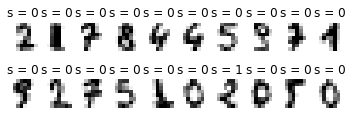

In [16]:
images_and_labels = list(zip(X, y))
for index, (image, label) in enumerate(images_and_labels[62:82]):
    plt.subplot(4, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('s = %i' % label)

В методе можно использовать любой классификатор, который может предсказывать вероятность, возьмем в качестве такого логистический:

In [17]:
classifier = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')

In [18]:
nsamples, nx, ny = X.shape
data = X.reshape((nsamples, nx*ny))

nsamples, nx, ny = X_to_predict.shape
data_to_predict = X_to_predict.reshape((nsamples, nx*ny))

Воспользуемся методом:

In [31]:
prob = fit_and_predict(classifier, data, y, data_to_predict)

/home/dasha/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Будем считать, что объект относится к positive class, если предсказанная вероятность получилась больше 0.5

In [32]:
predicted_positives = np.where(prob >= 0.5)[0]
predicted_labels = np.zeros(y_to_predict.size)
predicted_labels[predicted_positives] = 1

pos_ind = np.where(y_to_predict == 2)[0]
true_labels = np.zeros(len(y_to_predict))
true_labels[pos_ind] = 1

In [33]:
pos_ind = np.where(y_to_predict == 2)[0]
true_labels = np.zeros(len(y_to_predict))
true_labels[pos_ind] = 1

Сравним с настоящими значениями классов:

In [34]:
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
print(conf_matrix)

[[537   2]
 [ 33  22]]


In [35]:
accuracy = metrics.accuracy_score(true_labels, predicted_labels)

print('Accuracy:', accuracy)

Accuracy: 0.9410774410774411
